In [1]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression, chi2, VarianceThreshold
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from pymatgen.analysis import magnetism
import tqdm
from mat2vec.processing import MaterialsTextProcessor
import tqdm

In [2]:
Elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 
    'S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn',
    'Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru',
    'Rh','Pd','Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce',
    'Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf',
    'Ta','W','Re','Os','Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn',
    'Fr','Ra','Ac','Th','Pa','U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm',
    'Md','No','Lr','Rf','Db','Sg','Bh','Hs','Mt','Ds','Rg','Cn','Uut',
    'Fl','Uup','Lv','Uus','Uuo']



'''
Class to be imported in pipeline (below) for dropping the most correlated columns, preventing data leakage.
'''

class MyDecorrelator(BaseEstimator, TransformerMixin): 
    
    def __init__(self, threshold):
        self.threshold = threshold
        self.correlated_columns = None

    def fit(self, X, y=None):
        correlated_features = set()  
        X = pd.DataFrame(X)
        corr_matrix = X.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold: # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    correlated_features.add(colname)
        self.correlated_features = correlated_features
        return self

    def transform(self, X, y=None, **kwargs):
        return (pd.DataFrame(X)).drop(labels=self.correlated_features, axis=1)

In [3]:
MPj = pd.read_excel('mats_from_MPj.xlsx', index_col = 0)
MPj = MPj.rename(columns={"pretty_formula": "Components"})
MPj = MPj.dropna()

In [4]:
normalizer = MaterialsTextProcessor()
for i in tqdm.tqdm(range(len(MPj))):
    MPj['Components'].iloc[i] = normalizer.normalized_formula(MPj['Components'].iloc[i])

  0%|                                                                                       | 0/154715 [00:00<?, ?it/s]C:\Users\giovanni\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|█████████████████████████████████████████████████████████████████████████| 154715/154715 [06:40<00:00, 386.61it/s]


In [6]:
SuperCon = pd.read_excel(r'new_supercon.xlsx')
SuperCon = SuperCon[['element', 'tc', 'year.1']]
SuperCon.rename(columns = {'element':'Components'}, inplace = True)
SuperCon.rename(columns = {'tc':'Tc'}, inplace = True)
SuperCon.rename(columns = {'year.1':'year'}, inplace = True)

In [7]:
for i in range(len(SuperCon)):
    if str(SuperCon['Tc'].iloc[i]) == 'nan':
        SuperCon['Tc'].iloc[i] = 0

In [8]:
for i in range(len(SuperCon)):
    if '-' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN

for i in range(len(SuperCon)):
    if ',' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN
        
for i in range(len(SuperCon)):
    if '+' in SuperCon['Components'].iloc[i]:
        SuperCon['Tc'][i] = np.NaN
import re
S2 = set(Elements)

for i in range(len(SuperCon)):
    list_1 = re.findall('[A-Z][a-z]|[A-Z]', SuperCon['Components'].iloc[i])
    S1 = set(list_1)
    
    if len(S1) > len(S1.intersection(S2)):
        if not SuperCon['Tc'].isna().iloc[i]:
            print(SuperCon['Components'].iloc[i])

            SuperCon['Tc'].iloc[i] = np.NaN

C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Yb16Ba1Cu2Oz
Yb1.8Ba0.2Cu1Oz
Yb6Ba1Cu1Oz
Yb1.62La0.18Ba0.18Sr0.02Cu1Oz
Y0.4Ba0.6Cu1OX
Y0.4Ba0.6Cu1OX
Er0.5Ba0.5Cu1OX
Tm0.35Ba0.65Cu1OX
Tm0.3Ba0.7Cu1OX
Tm0.25Ba0.75Cu1OX
Tm0.2Ba0.8Cu1OX
Y1Ba2Cu3OX
Nd0.4Ba0.6Cu1OX
La1Ba2Cu3OX
Pr2Ba3Cu5OX
Nd2Ba3Cu5OX
Sm1Ba2Cu3OX
Eu2Ba3Cu5OX
Gd2Ba3Cu5OX
Dy2Ba3Cu5OX
Tm1Ba2Cu3OX
Y1Ba2Cu3OX
Y1Ba2Cu3OX
Y1Ba2Cu3OX
Y0.8Ba1.2Cu1OX
Y0.6Ba0.9Cu1OX
Yb1.6La0.2Ba0.2Cu1Oz
Y0.4Ba0.6Cu1OX
Er1Ba2Cu3OX
Ho1Ba2Cu3OX
Gd1Ba2Cu3OX
Eu1.5Ba1.5Cu3Oz
Gd1.5Ba1.5Cu3Oz
Y1.5Ba1.5Cu3Oz
Yb1.5Ba1.5Cu3Oz
Y1Ba2Cu2.55Co0.45Oz
Y1Ba2Cu3F0.066Oz
Y1Ba2Cu3F0.066Oz
Y1Ba2Cu3F0.165Oz
Y1Ba2Cu3F0.016Oz
Y1Ba2Cu3F0.033Oz
Y1Ba2Cu3F0.05Oz
Y1Ba2Cu3Oz
Y1Ba2Cu3Oz
Y1Ba2Cu3Oz
Gd1Ba2Cu3Oz
Er1Ba2Cu3OX
Dy1Ba2Cu3OX
Ho1Ba2Cu3OX
Y1Ba2Cu3OX
La1.85Sr0.15Cu0.97Ni0.03OX
La1.85Sr0.15Cu0.95Ni0.05OX
Tl2Ca2Ba1Cu3OX
Tl2Ca2Ba2Cu3OX
Tl1Ca4Cu5OX
Tl2Ca1Ba2Cu2Oz
Y1Ba2Cu3Oz
Y1Ba2Cu2.85Ti0.15Oz
Y1Ba2Cu2.7Ti0.3Oz
Y1Ba2Cu2.55Ti0.45Oz
Y1Ba2Cu2.4Ti0.6Oz
Y1Ba2Cu2.25Ti0.75Oz
Y1Ba2Cu2.1Ti0.9Oz
Bi1Sr1Ca1Cu2Oz
Bi2Sr1.8Ca1.2Cu2Oz
Bi2Sr3Ca4Cu

In [9]:
SuperCon = SuperCon.dropna(axis = 0)
SuperCon = SuperCon.sort_values('Tc', ascending = False)
import tqdm
normalizer = MaterialsTextProcessor()
for i in tqdm.tqdm(range(len(SuperCon))):
    SuperCon['Components'].iloc[i] = normalizer.normalized_formula(SuperCon['Components'].iloc[i])

100%|██████████████████████████████████████████████████████████████████████████| 26299/26299 [00:15<00:00, 1744.44it/s]


In [10]:
grouped_df = SuperCon.groupby('Components')
grouped_Tc = grouped_df['Tc'].apply(list).reset_index()
grouped_year = grouped_df['year'].apply(list).reset_index()
grouped_Tc['year'] = grouped_year['year']
grouped = grouped_Tc[['Components']]

In [11]:
def get_compostion(c): # Function to get compositions from chemical formula using pymatgen
    try:
        return Composition(c)
    except:
        return None

def featurizing(data,property_interest=None):
    # Featurizer
    f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                             cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
    # Inputs
    data['composition'] = [get_compostion(mat) for mat in data.Components]
    featurized_data = pd.DataFrame(f.featurize_many(data['composition'], ignore_errors=True), columns=f.feature_labels(), index=data['Components'])
    if property_interest:
        featurized_data[property_interest] = data[property_interest].values
    return featurized_data

In [12]:
MPj = MPj[['Components']].drop_duplicates()

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression, f_classif, chi2, VarianceThreshold
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from pymatgen import Composition
import matplotlib.pyplot as plt

Complete_MPj = featurizing(MPj)

C:\Users\giovanni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


MultipleFeaturizer:   0%|          | 0/105582 [00:00<?, ?it/s]

In [14]:
Complete_MPj = Complete_MPj.dropna()

In [16]:
Complete_MPj = Complete_MPj.reset_index()
Complete_MPj['is_in_SuperCon'] = 0
for i in tqdm.tqdm(range(len(Complete_MPj))):
    if Complete_MPj['Components'].iloc[i] in list(grouped['Components']):
        Complete_MPj['is_in_SuperCon'].iloc[i] = 1

100%|█████████████████████████████████████████████████████████████████████████| 105578/105578 [03:20<00:00, 527.67it/s]


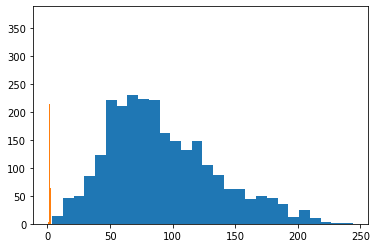

In [17]:
import random
Complete_MPj_no_SuperCon = Complete_MPj[Complete_MPj['is_in_SuperCon'] == 0]
c = plt.hist(Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1]['MagpieData mean AtomicWeight'].values, bins = 28)
d = plt.hist(Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1]['MagpieData mean Electronegativity'].values, bins = 28)
samples_atomic = []
samples_electronegativity = []


for i in range(len(c[1])-1):
    samples_atomic.append(random.sample(set(Complete_MPj_no_SuperCon[Complete_MPj_no_SuperCon['MagpieData mean AtomicWeight'].between(c[1][i], c[1][i+1]) == True].index), 
                  int(c[0][i])))
for i in range(len(d[1])-1):
    samples_electronegativity.append(random.sample(set(Complete_MPj_no_SuperCon[Complete_MPj_no_SuperCon['MagpieData mean Electronegativity'].between(d[1][i], d[1][i+1]) == True].index), 
                  int(d[0][i])))
samples_random = random.sample(set(Complete_MPj_no_SuperCon.index), len(Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1]))

    
idxs_iid_atomic = [item for sublist in samples_atomic for item in sublist]
idxs_iid_electronegativity = [item for sublist in samples_electronegativity for item in sublist]
idxs_random = samples_random

Complete_MPj_iid_atomic = pd.concat([Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1][['Components', 'is_in_SuperCon']], 
           Complete_MPj_no_SuperCon[['Components', 'is_in_SuperCon']].loc[idxs_iid_atomic]]).reset_index()[['Components', 'is_in_SuperCon']]
Complete_MPj_iid_electronegativity = pd.concat([Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1][['Components', 'is_in_SuperCon']], 
           Complete_MPj_no_SuperCon[['Components', 'is_in_SuperCon']].loc[idxs_iid_electronegativity]]).reset_index()[['Components', 'is_in_SuperCon']]
Complete_MPj_random = pd.concat([Complete_MPj[Complete_MPj['is_in_SuperCon'] == 1][['Components', 'is_in_SuperCon']], 
           Complete_MPj_no_SuperCon[['Components', 'is_in_SuperCon']].loc[idxs_random]]).reset_index()[['Components', 'is_in_SuperCon']]

In [18]:
def get_compostion(c): # Function to get compositions from chemical formula using pymatgen
    try:
        return Composition(c)
    except:
        return None

def featurizing(data,property_interest=None):
    # Featurizer
    f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                             cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
    # Inputs
    data['composition'] = [get_compostion(mat) for mat in data.Components]
    featurized_data = pd.DataFrame(f.featurize_many(data['composition'], ignore_errors=True), columns=f.feature_labels(), index=data['Components'])
    if property_interest:
        featurized_data[property_interest] = data[property_interest].values
    return featurized_data

In [19]:
df_1 = featurizing(Complete_MPj_iid_atomic)
df_1['is_in_SuperCon'] = Complete_MPj_iid_atomic.set_index('Components')['is_in_SuperCon']

df_2 = featurizing(Complete_MPj_iid_electronegativity)
df_2['is_in_SuperCon'] = Complete_MPj_iid_electronegativity.set_index('Components')['is_in_SuperCon']

df_3 = featurizing(Complete_MPj_random)
df_3['is_in_SuperCon'] = Complete_MPj_random.set_index('Components')['is_in_SuperCon']

df_4 = featurizing(Complete_MPj_random)
df_4['is_in_SuperCon'] = 0
for i in range(len(df_4)):
    df_4['is_in_SuperCon'].iloc[i] = np.round(random.random())

MultipleFeaturizer:   0%|          | 0/5130 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/5130 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/5130 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/5130 [00:00<?, ?it/s]

In [20]:
df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()
df_4 = df_4.dropna()

In [21]:
train_df_1, test_df_1 = train_test_split(df_1, test_size = 0.2, random_state = 0)
train_df_2, test_df_2 = train_test_split(df_2, test_size = 0.2, random_state = 0)
train_df_3, test_df_3 = train_test_split(df_3, test_size = 0.2, random_state = 0)
train_df_4, test_df_4 = train_test_split(df_4, test_size = 0.2, random_state = 0)

In [22]:
def create_model(train_df):
    
    '''Pipeline for ETC-vanilla'''
    etc = ExtraTreesClassifier(random_state = 0)
    pipe = Pipeline([
        ('decorrelation', MyDecorrelator(0.9)), 
        ('threshold', VarianceThreshold(threshold = 0)), 
        ('feature_selector', SelectPercentile(f_classif)), 
        ('etc', etc)
    ], verbose = 1)
    param_grid = {
        "etc__n_estimators": [100, 250, 500],    #Tune the number of estimators
        "etc__max_features": [1, 0.75, 0.5],  #Tune the number of features to consider when looking for the best split
        "feature_selector__percentile": [50, 75, 100]       #Tune the percentage of features to retain in terms of f_regression score
    }

    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 0)
    search = GridSearchCV(pipe, param_grid, n_jobs=1, verbose = 1, cv = stratified_kfold)
    search.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1])

    return search

In [23]:
model_1 = create_model(train_df_1)
model_2 = create_model(train_df_2)
model_3 = create_model(train_df_3)
model_4 = create_model(train_df_4)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.6s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.5s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  8.4min finished


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   9.5s
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  9.3min finished


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.5s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=  11.3s
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  7.5min finished


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   6.0s
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   0.3s
[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 10.6min finished


[Pipeline] ..... (step 1 of 4) Processing decorrelation, total=   0.4s
[Pipeline] ......... (step 2 of 4) Processing threshold, total=   0.0s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing etc, total=   7.0s


In [24]:
test_predictions_1 = model_1.predict(test_df_1.iloc[:, :-1]) 
test_predictions_2 = model_2.predict(test_df_2.iloc[:, :-1]) 
test_predictions_3 = model_3.predict(test_df_3.iloc[:, :-1])
test_predictions_4 = model_4.predict(test_df_4.iloc[:, :-1])

test_labels_1 = test_df_1.iloc[:, -1].values
test_labels_2 = test_df_2.iloc[:, -1].values
test_labels_3 = test_df_3.iloc[:, -1].values
test_labels_4 = test_df_4.iloc[:, -1].values

test_proba_predictions_1 = model_1.predict_proba(test_df_1.iloc[:, :-1]) 
test_proba_predictions_2 = model_2.predict_proba(test_df_2.iloc[:, :-1]) 
test_proba_predictions_3 = model_3.predict_proba(test_df_3.iloc[:, :-1]) 
test_proba_predictions_4 = model_4.predict_proba(test_df_4.iloc[:, :-1]) 

fpr1, tpr1, thresholds1 = roc_curve(test_labels_1, test_proba_predictions_1.transpose()[1]) 
fpr2, tpr2, thresholds1 = roc_curve(test_labels_2, test_proba_predictions_2.transpose()[1])
fpr3, tpr3, thresholds3 = roc_curve(test_labels_3, test_proba_predictions_3.transpose()[1]) 
fpr4, tpr4, thresholds4 = roc_curve(test_labels_4, test_proba_predictions_4.transpose()[1])

print('F1 =', f1_score(test_labels_1, test_predictions_1), 
     'AUC =', roc_auc_score(test_df_1['is_in_SuperCon'], test_proba_predictions_1.transpose()[1]))
print('F1 =', f1_score(test_labels_2, test_predictions_2), 
     'AUC =', roc_auc_score(test_df_2['is_in_SuperCon'], test_proba_predictions_2.transpose()[1]))
print('F1 =',  f1_score(test_labels_3, test_predictions_3), 
     'AUC =', roc_auc_score(test_df_3['is_in_SuperCon'], test_proba_predictions_3.transpose()[1]))
print('F1 =', f1_score(test_labels_4, test_predictions_4), 
     'AUC =', roc_auc_score(test_df_4['is_in_SuperCon'], test_proba_predictions_4.transpose()[1]))

F1 = 0.8721374045801527 AUC = 0.9409413499880259
F1 = 0.875842155919153 AUC = 0.9398465801747831
F1 = 0.9012707722385143 AUC = 0.9650547955099233
F1 = 0.48523206751054854 AUC = 0.5157843853719436


In [27]:
model_3.best_params_

{'etc__max_features': 0.75,
 'etc__n_estimators': 250,
 'feature_selector__percentile': 100}

In [28]:
X_train_3 = train_df_3.iloc[:, :-1].loc[:, VarianceThreshold(threshold = 0).fit(train_df_3.iloc[:, :-1]).get_support()]
X_test_3 = test_df_3[X_train_3.columns]

correlated_features = set()  
corr_matrix = X_train_3.iloc[:, :-1].corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            correlated_features.add(colname)
            
X_train_3 = X_train_3.drop(labels=correlated_features, axis=1)
X_test_3 = X_test_3[X_train_3.columns]
y_train_3 = train_df_3.iloc[:, -1]
y_test_3 = test_df_3.iloc[:, -1]

In [29]:
etc_3 = ExtraTreesClassifier(random_state=0, n_estimators = 250, max_features = 0.75)
etc_3.fit(X_train_3, y_train_3)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=0.75,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [30]:
import shap
explainer = shap.TreeExplainer(etc_3)
shap_values = explainer.shap_values(X_test_3)

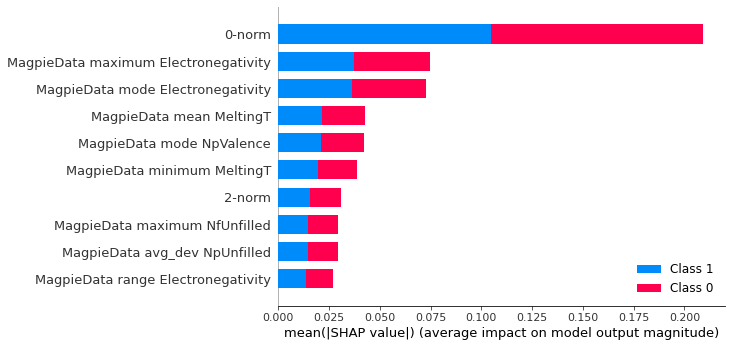

In [32]:
shap.summary_plot(shap_values, X_test_3, max_display = 10)

In [33]:
Output_shap_class1 = pd.DataFrame(shap_values[0], index = X_test_3.index, columns = X_test_3.columns)
Output_shap_class2 = pd.DataFrame(shap_values[1], index = X_test_3.index, columns = X_test_3.columns)

In [34]:
Output_shap_mean_class1 = pd.DataFrame(abs(Output_shap_class1).describe().loc['mean']/sum(abs(Output_shap_class1).describe().loc['mean'])).sort_values('mean', ascending = False)
Output_shap_mean_class2 = pd.DataFrame(abs(Output_shap_class2).describe().loc['mean']/sum(abs(Output_shap_class2).describe().loc['mean'])).sort_values('mean', ascending = False)

In [44]:
from matplotlib.pyplot import GridSpec
from matplotlib import gridspec

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


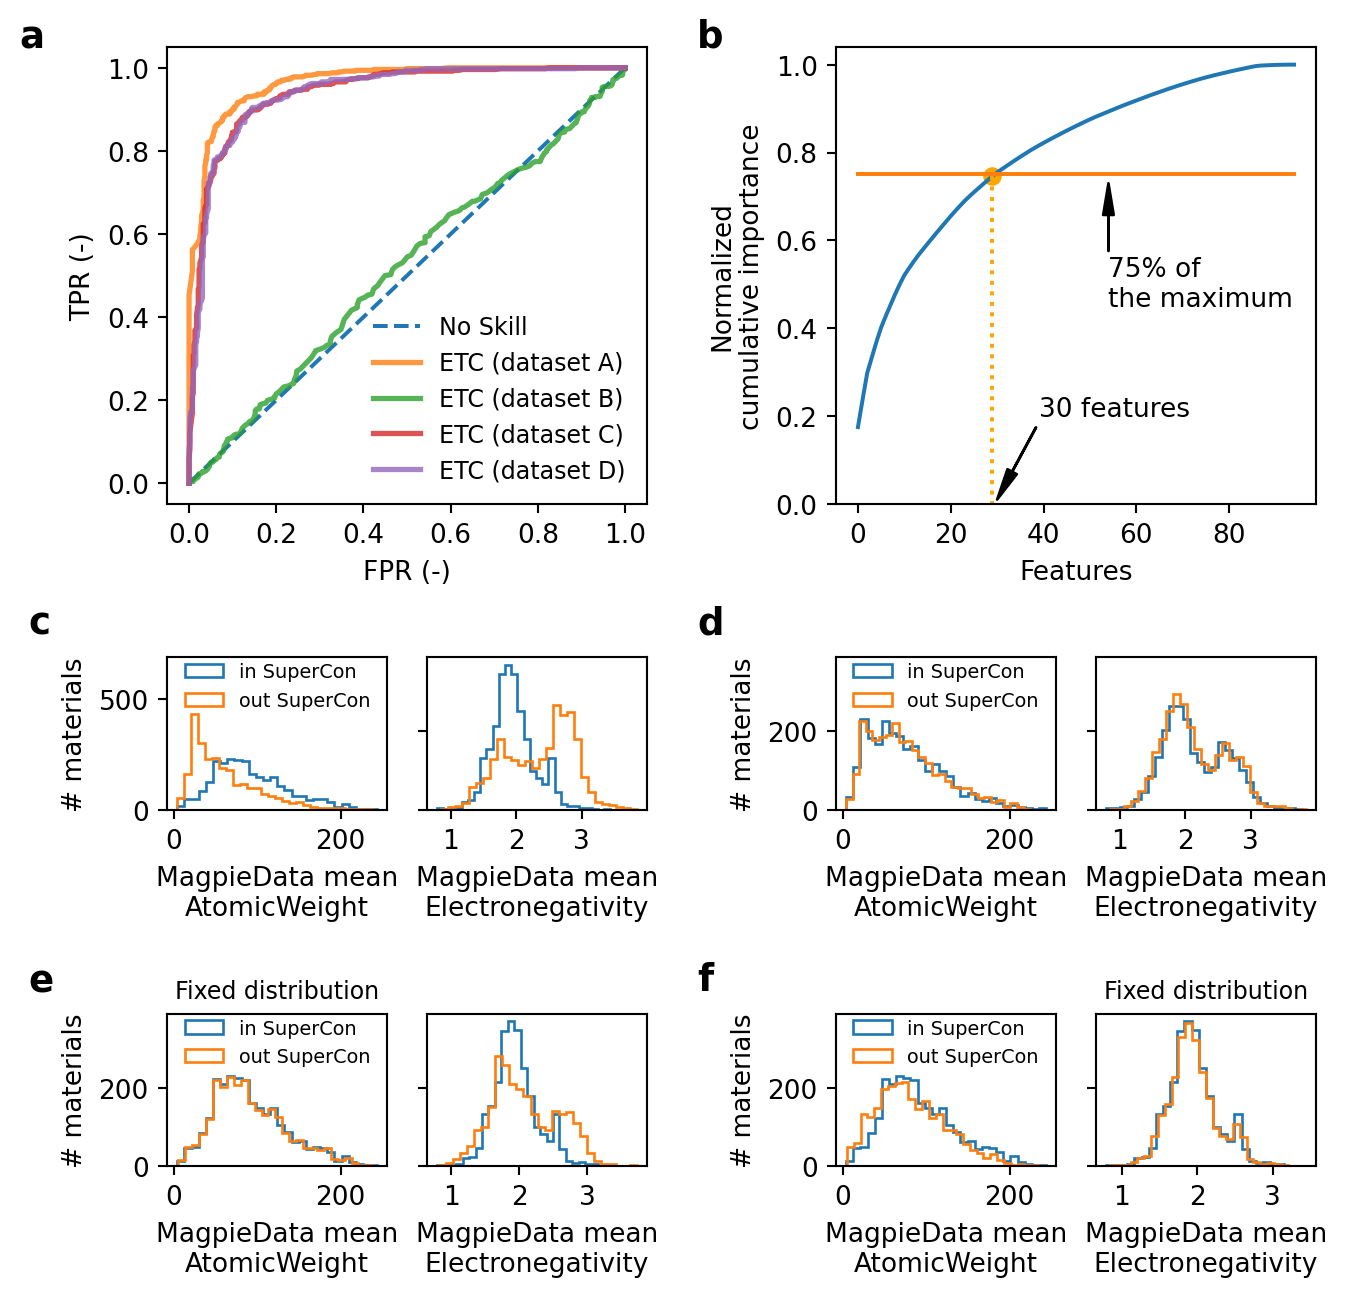

In [217]:
fig = plt.figure(1, figsize=(7.8, 7.8), dpi = 190)

gs = gridspec.GridSpec(5,5, width_ratios=[1,1,0.5,1,1], 
                       height_ratios=[.9, 0.15, 0.3, 0.25, 0.3])

ax5 = plt.subplot(gs[0, :2])
ax5.plot([0,1], [0,1], linestyle='--', label='No Skill')
alpha = .8
ax5.plot(fpr3, tpr3, linewidth = 2, label='ETC (dataset A)', alpha = alpha)
ax5.plot(fpr4, tpr4, linewidth = 2, label='ETC (dataset B)', alpha = alpha)
ax5.plot(fpr1, tpr1, linewidth = 2, label='ETC (dataset C)', alpha = alpha)
ax5.plot(fpr2, tpr2, linewidth = 2, label='ETC (dataset D)', alpha = alpha)
ax5.set_xlabel('FPR (-)')
ax5.set_ylabel('TPR (-)')
ax5.annotate(r'$\mathbf{a}$', xy = (0, 0), xytext = (-.39, 1.05), fontsize = 14)
ax5.legend(fontsize = 9, frameon = False)

ax6 = plt.subplot(gs[0, 3:5])
ax6.plot(np.arange(N), normalized_cumulative)
ax6.plot(np.arange(N), k*np.ones(N))
ind_cross1 = np.argmin(np.fabs(normalized_cumulative-k))
ax6.annotate('%i features' %(ind_cross1+1), xy=(ind_cross1+1, .01), xytext=(ind_cross1+10,.2),
            arrowprops=dict(facecolor='black', shrink=0.000005, width = .1, headwidth=4),
            )
ax6.annotate('75% of\nthe maximum', xy=(54, 0.73), xytext=(54, 0.45),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )
ax6.scatter(ind_cross1, normalized_cumulative.iloc[ind_cross1], color = 'orange')
ax6.plot((ind_cross1, ind_cross1), (normalized_cumulative.iloc[ind_cross1], 0), color = 'orange', ls = ':')
ax6.set_ylim(0, 1.04)
ax6.set_xlabel('Features')
ax6.set_ylabel('Normalized\ncumulative importance')
ax6.annotate(r'$\mathbf{b}$', xy = (0, 0), xytext = (-35, 1.04), fontsize = 14)


ax7 = plt.subplot(gs[2, 0])
ax7.hist(df_3[df_3['is_in_SuperCon'] == 1]['MagpieData mean AtomicWeight'], bins = 28, histtype='step', label = 'in SuperCon')
ax7.hist(df_3[df_3['is_in_SuperCon'] == 0]['MagpieData mean AtomicWeight'], bins = 28 , histtype='step', label = 'out SuperCon')
ax7.set_ylim(0, 690)
ax7.legend(frameon = False, fontsize = 7.3, loc='upper left', bbox_to_anchor=(0, .58, 0.5, 0.5))
ax7.set_ylabel('# materials')
ax7.annotate(r'$\mathbf{c}$', xy = (0, 0), xytext = (-175, 800), fontsize = 14)
ax7.set_xlabel('MagpieData mean\nAtomicWeight')
ax8 = plt.subplot(gs[2, 1])
ax8.hist(df_3[df_3['is_in_SuperCon'] == 1]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax8.hist(df_3[df_3['is_in_SuperCon'] == 0]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax8.set_ylim(0, 390)
ax8.tick_params(bottom=True, labelbottom=True, left=True, labelleft=False)
ax8.set_xlabel('MagpieData mean\nElectronegativity')


ax9 = plt.subplot(gs[2, 3])
ax9.hist(df_4[df_4['is_in_SuperCon'] == 1]['MagpieData mean AtomicWeight'], bins = 28, histtype='step', label = 'in SuperCon')
ax9.hist(df_4[df_4['is_in_SuperCon'] == 0]['MagpieData mean AtomicWeight'], bins = 28 , histtype='step', label = 'out SuperCon')
ax9.set_ylim(0, 390)
ax9.legend(frameon = False, fontsize = 7.3, loc='upper left', bbox_to_anchor=(0, .58, 0.5, 0.5))
ax9.set_ylabel('# materials')
ax9.annotate(r'$\mathbf{d}$', xy = (0, 0), xytext = (-175, 450), fontsize = 14)
ax9.set_xlabel('MagpieData mean\nAtomicWeight')
ax10 = plt.subplot(gs[2, 4])
ax10.hist(df_4[df_4['is_in_SuperCon'] == 1]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax10.hist(df_4[df_4['is_in_SuperCon'] == 0]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax10.set_ylim(0, 390)
ax10.tick_params(bottom=True, labelbottom=True, left=True, labelleft=False)
ax10.set_xlabel('MagpieData mean\nElectronegativity')

ax1 = plt.subplot(gs[4, 0])
ax1.hist(df_1[df_1['is_in_SuperCon'] == 1]['MagpieData mean AtomicWeight'], bins = 28, histtype='step', label = 'in SuperCon')
ax1.hist(df_1[df_1['is_in_SuperCon'] == 0]['MagpieData mean AtomicWeight'], bins = 28 , histtype='step', label = 'out SuperCon')
ax1.set_ylim(0, 390)
ax1.legend(frameon = False, fontsize = 7.3, loc='upper left', bbox_to_anchor=(0, .58, 0.5, 0.5))
ax1.set_ylabel('# materials')
ax1.set_title('Fixed distribution', fontsize = 9)
ax1.annotate(r'$\mathbf{e}$', xy = (0, 0), xytext = (-175, 450), fontsize = 14)
ax1.set_xlabel('MagpieData mean\nAtomicWeight')
ax2 = plt.subplot(gs[4, 1])
ax2.hist(df_1[df_1['is_in_SuperCon'] == 1]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax2.hist(df_1[df_1['is_in_SuperCon'] == 0]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax2.set_ylim(0, 390)
ax2.tick_params(bottom=True, labelbottom=True, left=True, labelleft=False)
ax2.set_xlabel('MagpieData mean\nElectronegativity')



ax3 = plt.subplot(gs[4, 3])
ax3.hist(df_2[df_2['is_in_SuperCon'] == 1]['MagpieData mean AtomicWeight'], bins = 28, histtype='step', label = 'in SuperCon')
ax3.hist(df_2[df_2['is_in_SuperCon'] == 0]['MagpieData mean AtomicWeight'], bins = 28 , histtype='step', label = 'out SuperCon')
ax3.set_ylim(0, 390)
ax3.legend(frameon = False, fontsize = 7.3, loc='upper left', bbox_to_anchor=(0, .58, 0.5, 0.5))
ax3.set_ylabel('# materials')
ax3.annotate(r'$\mathbf{f}$', xy = (0, 0), xytext = (-175, 450), fontsize = 14)
ax3.set_xlabel('MagpieData mean\nAtomicWeight')
ax4 = plt.subplot(gs[4, 4])
ax4.hist(df_2[df_2['is_in_SuperCon'] == 1]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax4.hist(df_2[df_2['is_in_SuperCon'] == 0]['MagpieData mean Electronegativity'], bins = 28 , histtype='step')
ax4.set_ylim(0, 390)
ax4.tick_params(bottom=True, labelbottom=True, left=True, labelleft=False)
ax4.set_title('Fixed distribution', fontsize = 9)
ax4.set_xlabel('MagpieData mean\nElectronegativity')

plt.show()


In [200]:
f = pd.DataFrame(['Cu9O250P60Pb91'], columns = ['Components'])
d = pd.DataFrame(['CuO25P6Pb9'], columns = ['Components'])
b = featurizing(f)
a = featurizing(d)

print(model_1.predict(b)
, model_1.predict(a))

MultipleFeaturizer:   0%|          | 0/1 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/1 [00:00<?, ?it/s]

[0] [0]


In [202]:
print(model_1.predict_proba(b), model_1.predict_proba(a))

[[0.842 0.158]] [[0.842 0.158]]
